<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220224_epsilon_contour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


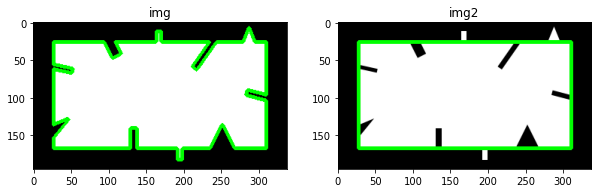

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/bad_rect.png')
img2 = img.copy()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thres = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour = contours[0] # contours는 좌표값이 하나 들어있는 "리스트"
len(contours) # 1개의 형태 : [(x, y)]
len(contour) # 297개의 꼭지점 좌표 : [[x, y], [], []]
# contour.shape : (297, 1, 2)

cv2.arcLength(contour, True) # contour의 꼭지점 좌표를 잇는 길이 : 컨투어의 길이

epsilon = 0.05 * cv2.arcLength(contour, True) # 컨투어 길이의 오차설정(5%)

approx = cv2.approxPolyDP(contour, epsilon, True) # 근사 컨투어 좌표

cv2.drawContours(img, [contour], -1, (0,255,0), 3)
# drawContours에 파라미터로 들어가는 컨투어 형식 유의(좌표가 아닌 리스트형태)
cv2.drawContours(img2, [approx], -1, (0,255,0), 3)
# drawContours에 img를 다시 쓰게 되면 앞서 그린 컨투어에 덧씌워져 그려짐

imgs = {"img":img, "img2":img2}
plt.figure(figsize=(10, 5))
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1, len(imgs), i+1)
    plt.title(k)
    plt.imshow(v, cmap='gray')


In [3]:
type(contours)

list